In [1]:
import tensorflow as tf
import numpy as np
import cPickle as pickle
import h5py
import matplotlib.pyplot as plt
from solver import CaptioningSolver
from model import CaptionGenerator
from cs231n.coco_utils import load_coco_data, sample_coco_minibatch, decode_captions
from cs231n.image_utils import image_from_url

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
with open('small_data.pkl', 'rb') as f:
    small_data = pickle.load(f)

for k, v in small_data.iteritems():
    if type(v) == np.ndarray:
        print k, type(v), v.shape, v.dtype
    else:
        print k, type(v), len(v)

image_idxs <type 'numpy.ndarray'> (100,) int32
id_to_idx <type 'dict'> 82783
features <type 'numpy.ndarray'> (100, 14, 14, 512) float64
idx_to_word <type 'dict'> 1259
idx_to_id <type 'dict'> 82783
image_file_name <type 'list'> 82783
captions <type 'numpy.ndarray'> (100, 17) int32
word_to_idx <type 'dict'> 1259


In [16]:
small_captions = small_data['captions'] 
small_data['train_captions'] = small_captions

small_features = small_data['features'].reshape(100,196,512)
small_features = (small_features - np.mean(small_features)) * 0.01
small_data['train_features'] = small_features
word_to_idx = small_data['word_to_idx']

In [25]:
model = CaptionGenerator(word_to_idx, batch_size= 100, dim_feature=[196, 512], dim_embed=128,
                                   dim_hidden=128, n_time_step=16, cell_type='lstm', dtype=tf.float32)

In [30]:
solver = CaptioningSolver(model, small_data, n_epochs=200, batch_size=100, update_rule='adam',
                                      learning_rate=0.004, print_every=10, save_every=10000,
                                    save_model_path='./model/', test_model_path='./model/model-200', pretrained_model=None)

In [31]:
decode_captions(small_data['train_captions'], small_data['idx_to_word'])[0:10]

[u'<START> a restaurant has modern wooden tables and chairs <END>',
 u'<START> a long restaurant table with <UNK> <UNK> back chairs <END>',
 u'<START> a long table with a plant on top of it surrounded with wooden chairs  <END>',
 u'<START> a long table with a flower <UNK> in the middle for <UNK> <END>',
 u'<START> a table is <UNK> with wooden chairs with blue <UNK> <END>',
 u'<START> a man preparing <UNK> in a kitchen covered in frosting <END>',
 u'<START> a chef is preparing and <UNK> many small pastries <END>',
 u'<START> a <UNK> prepares various types of baked <UNK> <END>',
 u'<START> a close up of a person <UNK> a pastry in a container <END>',
 u'<START> close up of a hand touching various pastries <END>']

n_epochs:  200
n_iters_per_epoch:  1
batch size:  100
n_examples:  100
variable name: W_init_h_4/read:0
Train Loss at Epoch 0: 7713.31201
Generated Caption: <START> a a a a a a a a a a a a a a a a
Generated Caption: <START> a a a a a a a a a a a a a a a a
Generated Caption: <START> a a a a a a a a with with with with with with with with
Generated Caption: <START> a a a a a a a a a a a a a a a a
Generated Caption: <START> a a a a a at at at at at at at at at at at
Generated Caption: <START> a a a a a a a a a a a a a a a a
Generated Caption: <START> a a a a a a a a a a a a a a a a
Generated Caption: <START> a a a a a a a a a a a a a a a a
Generated Caption: <START> a a a a a a a a a a a a a a a a
Generated Caption: <START> a a a a a a a a a a a a a a a a
Train Loss at Epoch 10: 4360.50830
Generated Caption: <START> a a <END>
Generated Caption: <START> a a a <UNK> <UNK> <UNK> <END>
Generated Caption: <START> a a a <END>
Generated Caption: <START> a a a a <END>
Generated Caption: <START> a

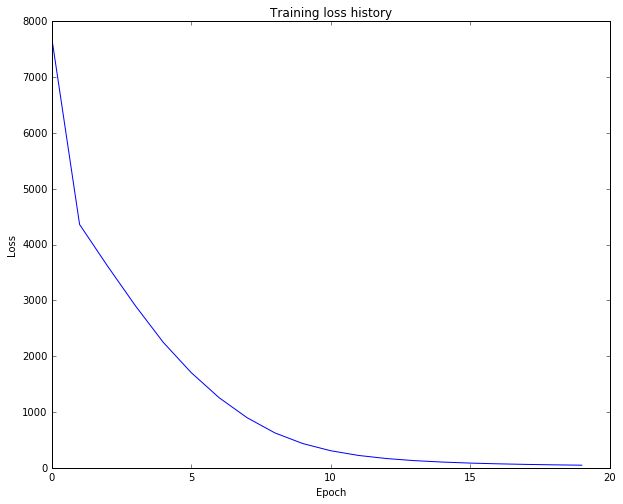

In [32]:
solver.train()
# Plot the training losses
plt.plot(solver.loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss history')
plt.show()

In [ ]:
solver.test()

In [ ]:
loss, generated_captions = model.build_model()
optimizer = tf.train.AdamOptimizer(0.004).minimize(loss)
n_epoch = 2000

with tf.Session() as sess:
    tf.initialize_all_variables().run()
    for e in range(n_epoch):
        feed_dict =  {model.features: data['train_features'], model.captions: data['train_captions']}
        _, gen_caps, l = sess.run([optimizer, generated_captions, loss], feed_dict)
        if e % 10 == 0:
            print "loss at epoch %d: %.5f" %(e, l)
            decoded = decode_captions(gen_caps, model.idx_to_word)
            print "Generated Sentence: %s" %decoded[0]